In [3]:
from torch.utils.data import Dataset, DataLoader
from wrapper import XRAY
from split import split_data

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [4]:
image_folder = 'images'
label_path = 'Data_Entry_2017.csv'
images = os.listdir(image_folder)

In [5]:
train_filenames, val_filenames, test_filenames = split_data(label_path)

[('00000001_000.png', 2.0), ('00000001_001.png', 1.0), ('00000001_002.png', 2.0), ('00000002_000.png', 0.0), ('00000003_000.png', 0.0)]
num experiments is 4999


C:\Users\Justin Xu\Anaconda3\envs\cs231\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
print(len(train_filenames))
print(len(val_filenames))
print(len(test_filenames))

3499
750
750


In [7]:
print(train_filenames[:5])

[('00000814_007.png', 0.0), ('00000013_006.png', 2.0), ('00001081_002.png', 0.0), ('00000522_003.png', 0.0), ('00001226_002.png', 2.0)]


In [8]:
train_dataset = XRAY(image_folder, train_filenames)
val_dataset = XRAY(image_folder, val_filenames)
test_dataset = XRAY(image_folder, test_filenames)

In [9]:
print(train_dataset[0][0].shape)
print(len(train_dataset))

torch.Size([3, 299, 299])
3499


In [10]:
trainset_loader = DataLoader(train_dataset, batch_size=5, shuffle=False, num_workers=8)

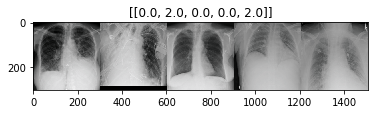

In [11]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, scores = next(iter(trainset_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[scores.tolist()])

In [12]:
label_dict = {}
for i in range(len(train_dataset)):
    label = train_dataset[i][1]
    if label not in label_dict:
        label_dict[label] = 0    
    label_dict[label] += 1
    if i%100 == 0:
        print(i)
print(label_dict)

0
100
200
300
400
500
600
700
800
900
1000
1100


KeyboardInterrupt: 

In [13]:
val_counts = [x[1] for x in val_dataset]
test_counts = [x[1] for x in test_dataset]

In [14]:
print(val_counts)
print(test_counts)

[0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.5, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 2.5, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 1.4, 1.3333333333333333, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 1.0, 2.0, 0.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 3.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.3333333333333335, 0.0, 0.0, 1.25, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5, 2.0, 0.0, 2.0, 2.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 2.0, 2.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0, 2.0, 0.0, 0.0, 0.0, 2.0, 1.3333333333333333, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.5, 2.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5, 0.0, 2.5, 0.0, 1.25, 2.5, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.6666666666

[0.5, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 2.0, 1.0, 0.0, 2.0, 2.0, 0.0, 2.5, 2.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.5, 0.0, 0.0, 0.0, 0.0, 1.3333333333333333, 0.0, 0.0, 0.0, 1.5, 2.5, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.3333333333333333, 2.0, 0.0, 0.0, 0.0, 2.0, 1.6666666666666667, 0.0, 3.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 2.0, 0.0, 2.5, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 2.0, 0.0, 0.0, 2.0, 1.6666666666666667, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0.3333333333333333, 2.0, 1.6666666666666667, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3.0, 2.0, 0.0, 0.0, 2.0, 1.3333333333333333, 0.0, 1.5, 0.0, 0.0, 1.3333333333333333, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.5, 0.0, 0.0, 0.0, 0.0, 0.0,

In [15]:
import pandas as pd
df = pd.DataFrame([val_counts])
df.stack().value_counts().to_dict()

{0.0: 480,
 0.5: 4,
 0.6666666666666666: 3,
 1.0: 30,
 1.25: 2,
 1.3333333333333333: 10,
 1.4: 1,
 1.5: 9,
 1.6666666666666667: 5,
 1.75: 1,
 2.0: 142,
 2.25: 3,
 2.3333333333333335: 4,
 2.5: 24,
 3.0: 32}

In [16]:
df2 = pd.DataFrame([test_counts])
df2.stack().value_counts().to_dict()

{0.0: 476,
 0.3333333333333333: 1,
 0.5: 5,
 0.6666666666666666: 5,
 0.75: 1,
 1.0: 38,
 1.2: 1,
 1.3333333333333333: 12,
 1.5: 13,
 1.6666666666666667: 6,
 1.75: 1,
 2.0: 136,
 2.25: 2,
 2.3333333333333335: 9,
 2.5: 20,
 3.0: 24}